<b> <h1> vektörlerin tSNE ile boyut indirgenmesi ve görselleştirilmesi </h1> <br>

In [1]:
# kelimeVec-1.txt dosyasında önceden eğitilmiş kelimeler ve bunların vektör karşılıkları olsun:

    #  türkiye 0.17971 -0.33787 -0.29897 -0.45949 
    #  istanbul -0.046406 0.036643 -0.1067 -0.12378 
    #  ankara -0.026434 0.013544 -0.091341 -0.19564 
    #  almanya 0.10396 -0.12048 0.027103 -0.4349 
    #  fransa -0.37203 0.02605 -0.23266 -1.1524 
    #  paris -0.25637 -0.073173 -0.18539 -0.66266 
    #  berlin -0.16518 -0.16686 0.10747 0.095184
    #  münih -0.080603 0.28828 0.46011 -0.22857
    #  frankfurt 0.10926 0.15596 -0.027719 0.0064991

In [2]:
import os
import sys

# Hangi  Python ?
print(sys.executable)

/home/ibrahim/.conda/envs/irhTF35/bin/python


In [3]:
#dosya yolunu belirle

here = os.getcwd()
sample_dir = os.path.join(here, "kelimeVec-1.txt")
#print(sample_dir)

In [12]:
# kelimeleri y, vektör karşılıklarını da x arraylerine yerleştir

arr_x = [] 
arr_y = [] 

with open(sample_dir, "r", encoding="utf-8") as ins:
    for line in ins:
        values = line.strip().split()
        arr_y.append(values[0])
        arr_x.append(values[1:])
print('%s adet vektör bulundu.' % len(arr_y))

9 adet vektör bulundu.


In [5]:
print(arr_x[0], " = ", arr_y[0])

['0.17971', '-0.33787', '-0.29897', '-0.45949']  =  türkiye


In [11]:
from sklearn.manifold import TSNE

# önce bir TSNE modeli nesnesi oluşturulur
model = TSNE(learning_rate = 100)

# bazı önemli default parametler:

# learning_rate=200.0,  10.0 ile 1000.0 arasında
# n_iter = 1000,  en az 250 olmalı 
# min_grad_norm=1e-07,
# metric=’euclidean’,

# fit_transform metoduyla boyut indirgeme modeli eğitilir

transformed = model.fit_transform(arr_x)

# önemli !!!
# fit_transform her çağrıldığında birebir aynı noktaları bulmayacaktır
# dolayısıyla çizdireceğimiz X,Y koordinat değerleri de farklı çıkacaktır

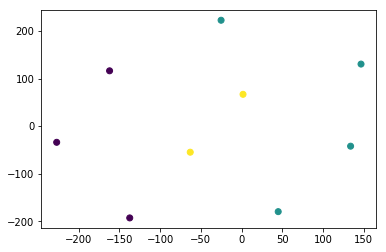

In [10]:
# indirgenmiş vektörlerin grafik üzerinde gösterilmesi

import matplotlib.pyplot as plt

xs = transformed[:,0]
ys = transformed[:,1]

# semantik benzerleğine göre kelimelere renkler verirsek
# 0: türkiye, istanbul, ankara
# 1: almanya, berlin, münih, frankfurt
# 2: fransa, paris

gruplar = [0, 0, 0, 1, 2, 2, 1, 1, 1]

plt.scatter(xs, ys, c=gruplar)